In [14]:
import torch
import matplotlib.pyplot as plt
from dataloader import MRIDataset
from residual3dunet.model import ResidualUNet3D
from torch.utils.data import Dataset, DataLoader
from utils import dice_coefficient
import torchvision.transforms as T

In [2]:
device = torch.device('cpu')
model = ResidualUNet3D(in_channels=1, out_channels=1, testing=True).to(device)
model.load_state_dict(torch.load("model24.pt", map_location=device))

<All keys matched successfully>

In [15]:
testdataset = MRIDataset(train=False, transform=T.ToTensor())
test_loader = DataLoader(dataset = testdataset, batch_size=1, shuffle=False)

In [16]:
model.eval()

dataiter = iter(test_loader)
data = dataiter.next()
data = dataiter.next()
data = dataiter.next()
features, labels = data

features, labels = features.float().to(device), labels.float().to(device)

output = model(features)

# for data, target in test_loader:
#     data, target = data.float().to(device), target.float().to(device)
#     output = model(data)
#     break

In [10]:
# preds = torch.sigmoid(output)
preds = (output > 0.5).float()

print(preds.shape)
batch, channel, depth, width, height = preds.shape

torch.Size([1, 1, 14, 240, 240])


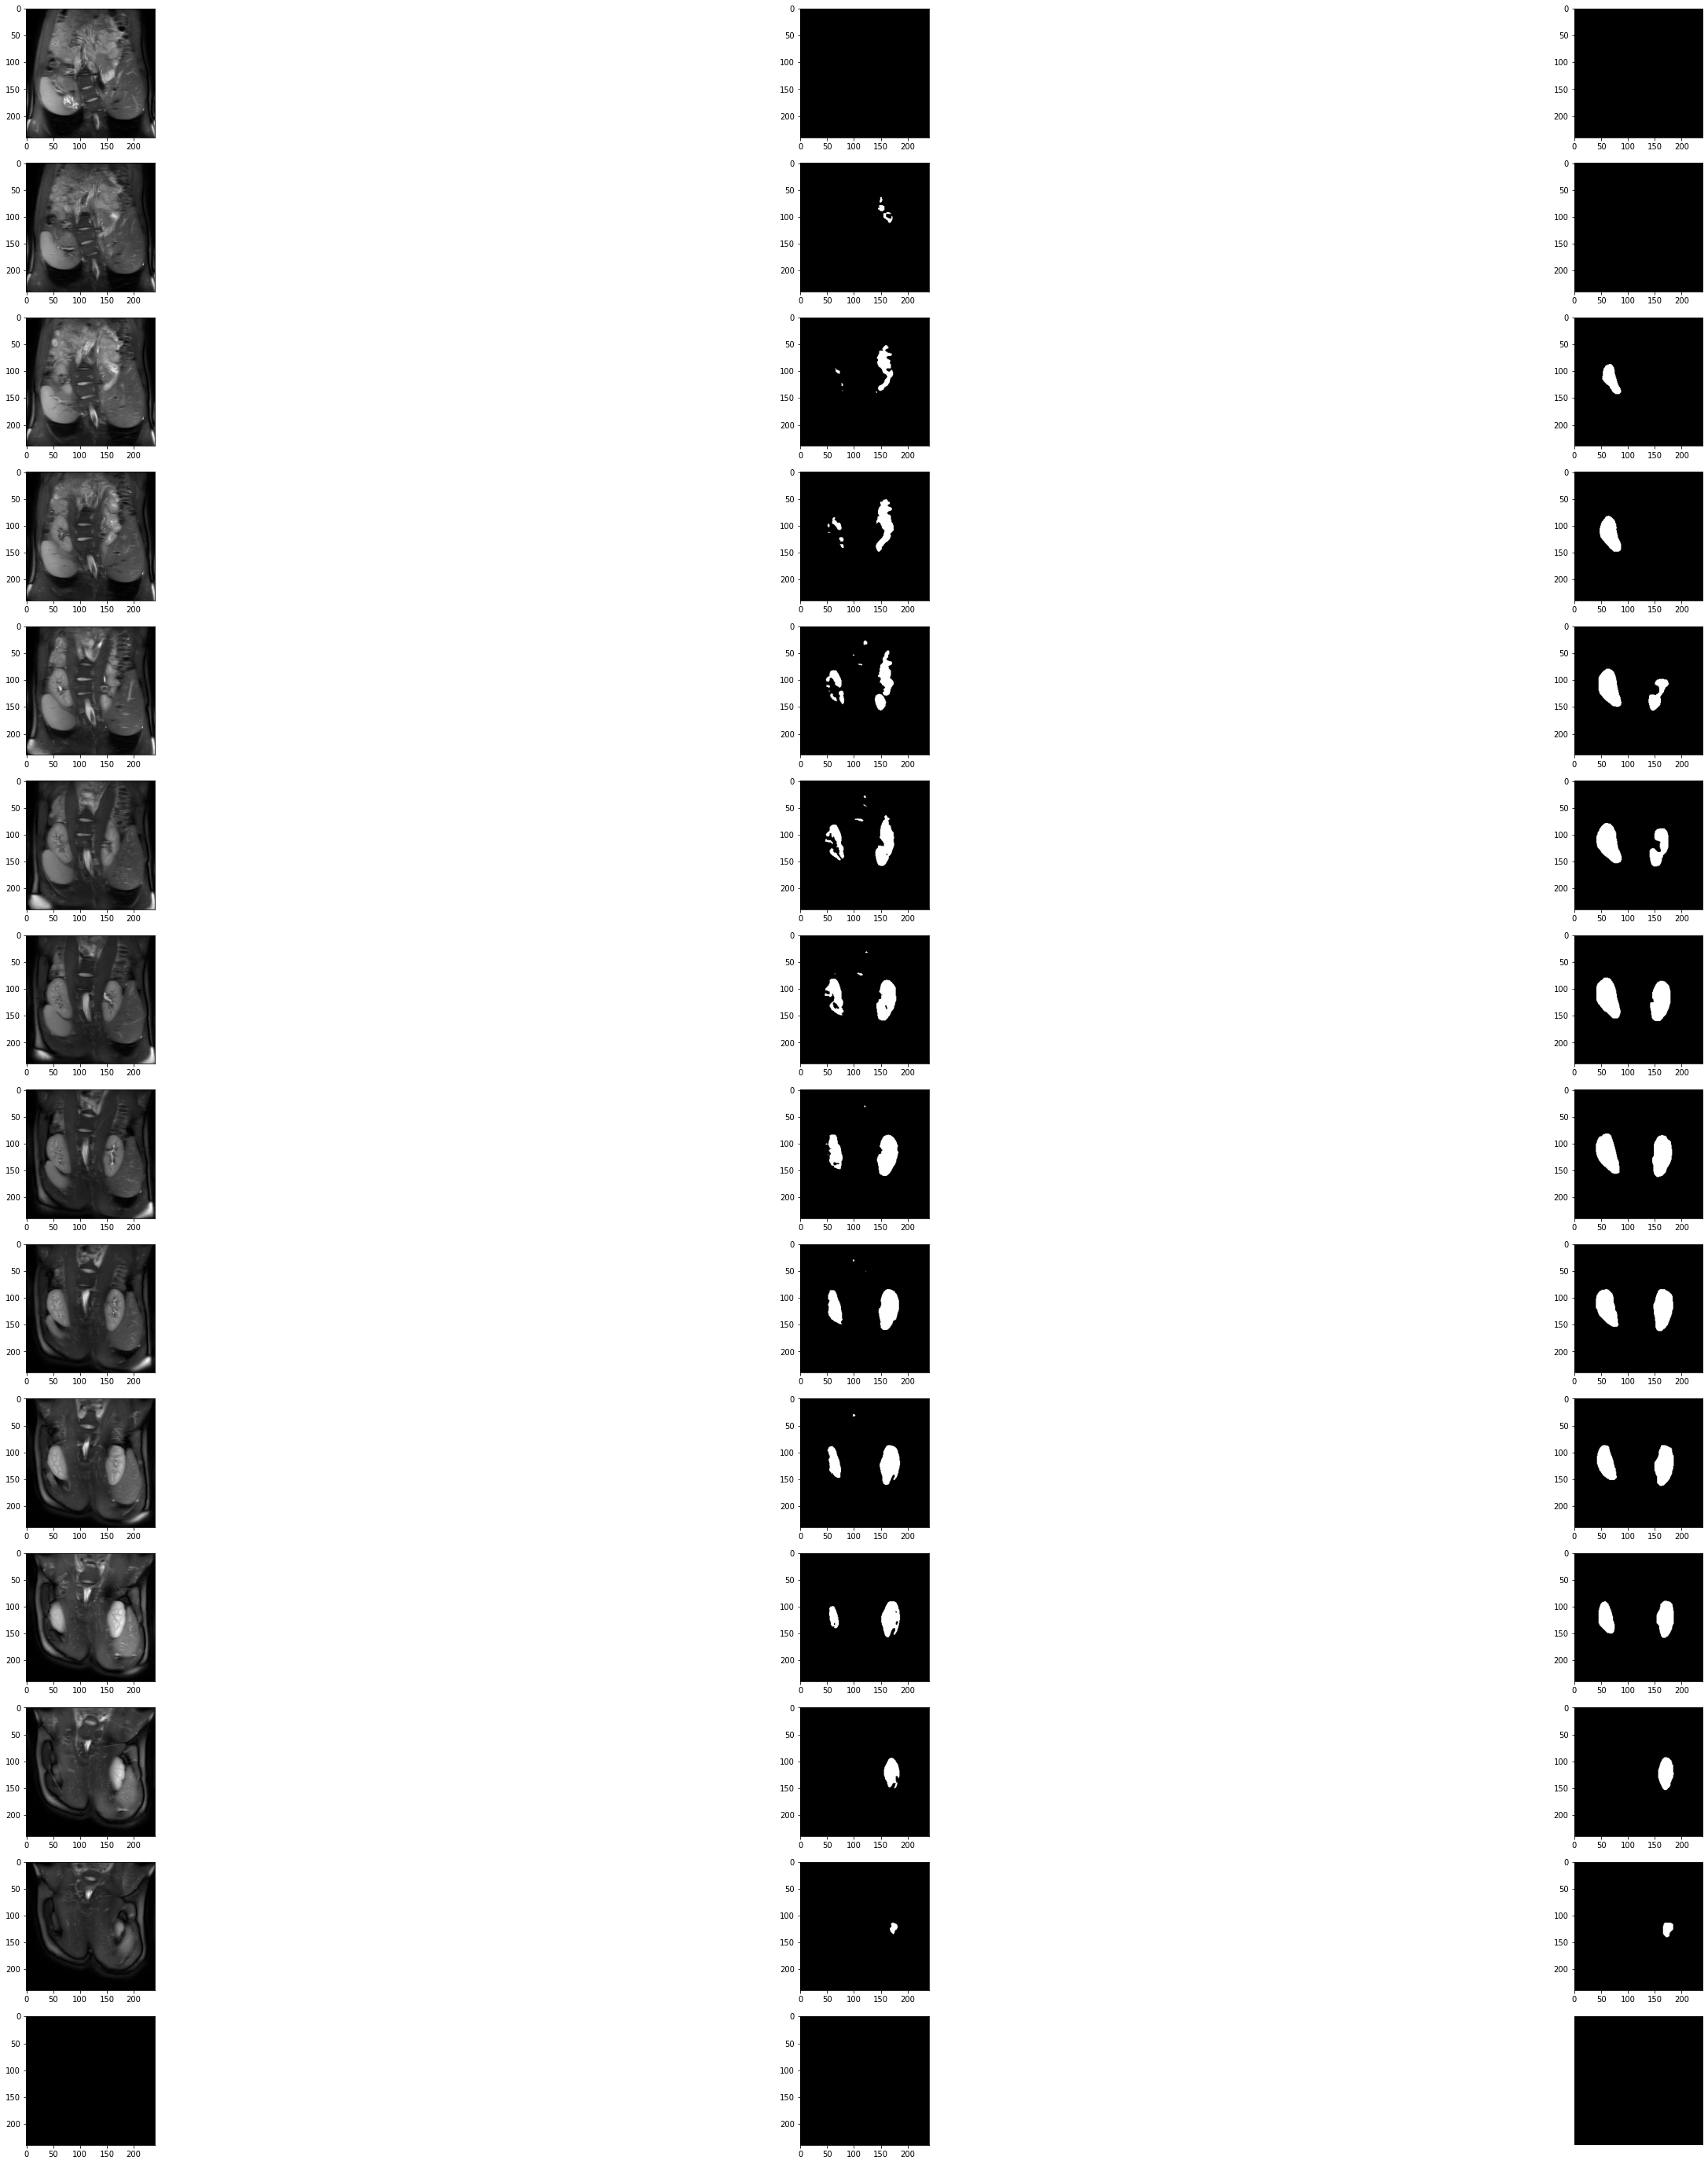

In [13]:
# Visualize Single Image Data
f, axarr = plt.subplots(14,3,figsize=(50,50))

for i in range(depth):
    axarr[i,0].imshow(features[0,0,i,:,:],cmap='gray')
    axarr[i,1].imshow(preds[0,0,i,:,:],cmap='gray')
    axarr[i,2].imshow(labels[0,0,i,:,:],cmap='gray')
    plt.axis('off')

In [17]:
prediction1 = preds[0,0,:,:,:]
target1 = labels[0,0,:,:,:]

print(target1.shape)

score = dice_coefficient(prediction1, target1)

torch.Size([14, 240, 240])


In [8]:
print(score)

tensor(0.7153)
